# Exploratoty Data Analysis Weather

### Importacion de librerias

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt   # gráficos

### Montaje de Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Lectura de datos


In [ ]:
#read a csv file

#  df_completo = pd.read_csv('trabajo practico 1/weather.csv') # en caso de que se use de manera local
df=pd.read_csv("/content/drive/Shareddrives/IA/weather (1).csv")
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [ ]:
# df.columns    #ver columas

### Reseteamos el indice 
* Dumplicamos el indice y lo usamos como columna


In [ ]:
df.reset_index(drop=False, inplace=True)
df.head()

index  Temperatura Minima  Temperatura Maxima  Caudal de lluvia  \
0      0                 8.0                24.3               0.0   
1      1                14.0                26.9               3.6   
2      2                13.7                23.4               3.6   
3      3                13.3                15.5              39.8   
4      4                 7.6                16.1               2.8   

   Evaporacion  Soleado WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  \
0          3.4      6.3          NW           30.0         SW         NW  ...   
1          4.4      9.7         ENE           39.0          E          W  ...   
2          5.8      3.3          NW           85.0          N        NNE  ...   
3          7.2      9.1          NW           54.0        WNW          W  ...   
4          5.6     10.6         SSE           50.0        SSE        ESE  ...   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0           29       1019.7       1015.0         7         7     14.4   
1           36       1012.4       1008.4         5         3     17.5   
2           69       1009.5       1007.2         8         7     15.4   
3           56       1005.5       1007.0         2         7     13.5   
4           49       1018.3       1018.5         7         7     11.1   

   Temp3pm  dia de lluvia  RISK_MM  Mañana va a lluver  
0     23.6             No      3.6                 Yes  
1     25.7            Yes      3.6                 Yes  
2     20.2            Yes     39.8                 Yes  
3     14.1            Yes      2.8                 Yes  
4     15.4            Yes      0.0                  No  

[5 rows x 23 columns]

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
list_columns_renames = {"index": "Dias",
                "MinTemp": "Temperatura Minima",
                "MaxTemp": "Temperatura Maxima",
                "Rainfall": "Caudal de lluvia",
                "Evaporation": "Evaporacion",
                "Sunshine": "Soleado",
                "RainToday": "dia de lluvia",
                "RainTomorrow": "Mañana va a lluver",              
                }

In [ ]:
#renombrar las columnas de interes
df.rename(columns=list_columns_renames, inplace=True)

In [ ]:
# df.head()

In [ ]:
# calculamos relación entre humedad y temperatura a las 3pm
temp_hum = df.Temp3pm / df.Humidity3pm

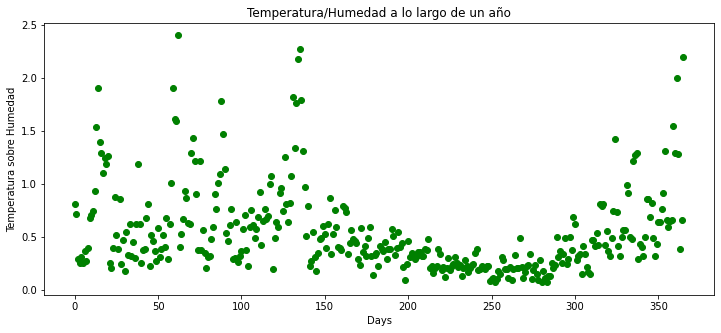

In [ ]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('Days')
plot1.set_ylabel('Temperatura sobre Humedad')
plot1.set_title('Temperatura/Humedad a lo largo de un año')
plot1.scatter(df["Dias"] , temp_hum, color='green')
plt.show()

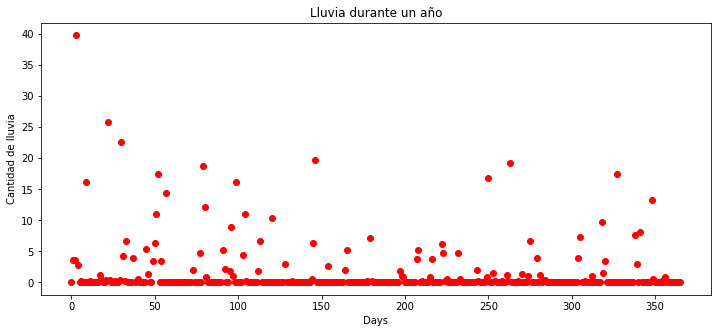

In [ ]:
# Dias de lluvia 
# Lo quisimos plotear para ver si habia relacion con el grafico de temperatura/humedad
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('Days')
plot1.set_ylabel('Cantidad de lluvia')
plot1.set_title('Lluvia durante un año')
plot1.scatter(df.Dias, df["Caudal de lluvia"], color='red')
plt.show()

In [ ]:
# df.columns

In [ ]:
# tambien existe df.drop(columns=list_of_columns, inplace=True) que es de pandas
def drop_columns(df, columns):
    for column in columns:
        df.drop(column, axis=1, inplace=True)
        
list_drop_columns = ["Evaporacion", 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
drop_columns(df,list_drop_columns)

In [ ]:
df.head()

Dias  Temperatura Minima  Temperatura Maxima  Caudal de lluvia  Soleado  \
0     0                 8.0                24.3               0.0      6.3   
1     1                14.0                26.9               3.6      9.7   
2     2                13.7                23.4               3.6      3.3   
3     3                13.3                15.5              39.8      9.1   
4     4                 7.6                16.1               2.8     10.6   

  dia de lluvia  RISK_MM Mañana va a lluver  
0            No      3.6                Yes  
1           Yes      3.6                Yes  
2           Yes     39.8                Yes  
3           Yes      2.8                Yes  
4           Yes      0.0                 No

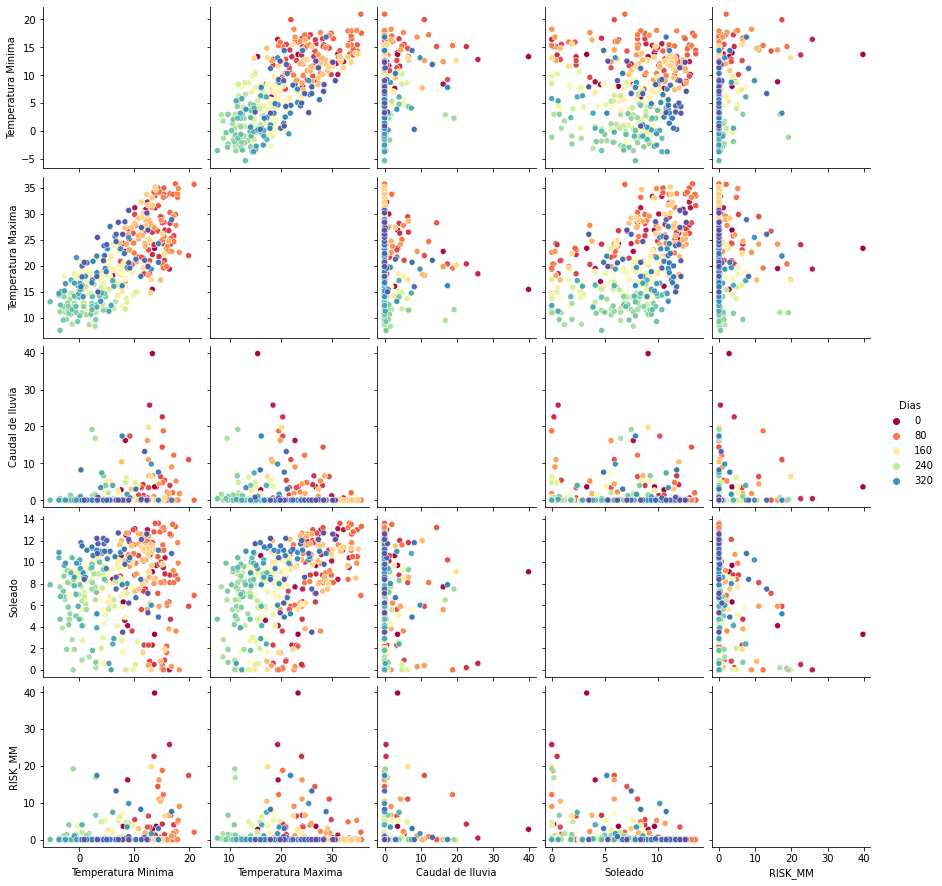

In [ ]:
sns.pairplot(df, hue="Dias",palette= "Spectral")

In [ ]:
# df.columns

In [12]:
relacion =df[['Dias', 'Temperatura Minima', 'Temperatura Maxima','Soleado']]
relacion.head()

KeyError: ignored

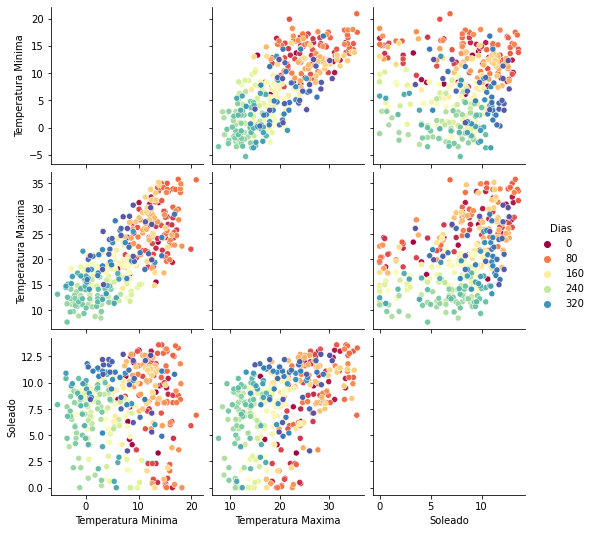

In [ ]:
sns.pairplot(relacion, hue="Dias",palette= "Spectral", height=2.5)

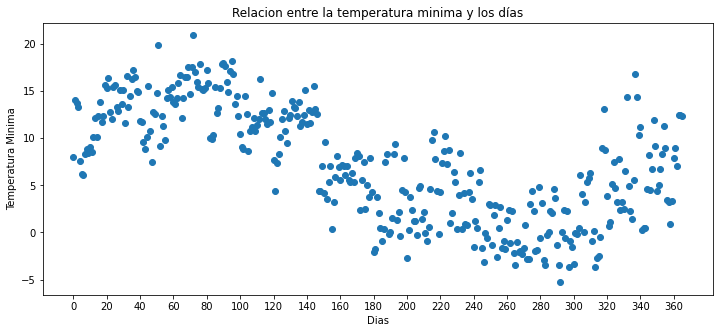

In [ ]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('Dias')
plot1.set_ylabel('Temperatura Minima')
plot1.set_title('Relacion entre la temperatura minima y los días')
plot1.set_xticks(list(range(0, 370, 20)))
plot1.scatter(df["Dias"], df["Temperatura Minima"])
plt.show()

In [ ]:
# df.columns

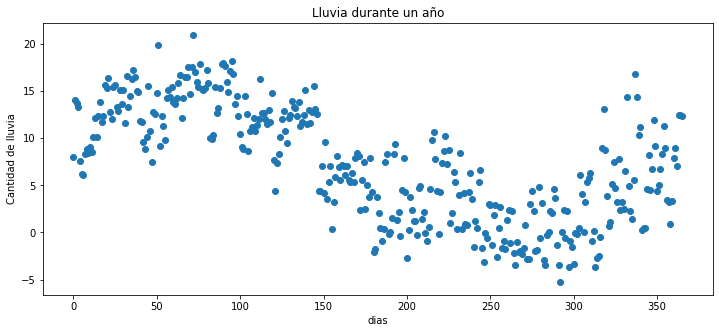

In [ ]:
# Dias de lluvia 
# Lo quisimos plotear para ver si habia relacion con el grafico de temperatura/humedad
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('dias')
plot1.set_ylabel('Cantidad de lluvia')
plot1.set_title('Lluvia durante un año')
plot1.scatter(df["Dias"], df["Temperatura Minima"])
plt.show()

In [ ]:
df_min_max = df[['Temperatura Minima', 'Temperatura Maxima']]
df_min_max

Temperatura Minima  Temperatura Maxima
0                   8.0                24.3
1                  14.0                26.9
2                  13.7                23.4
3                  13.3                15.5
4                   7.6                16.1
..                  ...                 ...
361                 9.0                30.7
362                 7.1                28.4
363                12.5                19.9
364                12.5                26.9
365                12.3                30.2

[366 rows x 2 columns]

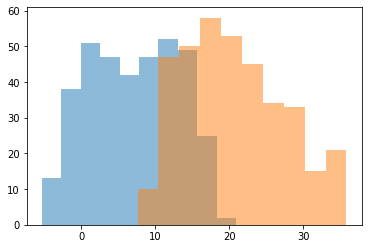

In [ ]:
for col in df_min_max:
    plt.hist(df[col], alpha=0.5)

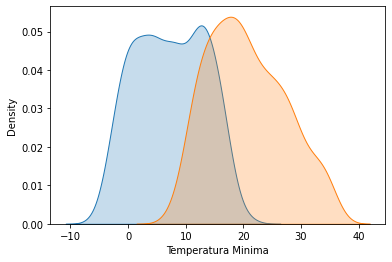

In [ ]:
for col in df_min_max:
    sns.kdeplot(df[col], shade=True)

In [ ]:
# df_min_max.head()

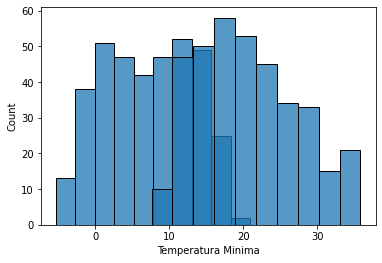

In [ ]:
sns.histplot(df['Temperatura Minima'])
sns.histplot(df['Temperatura Maxima'])

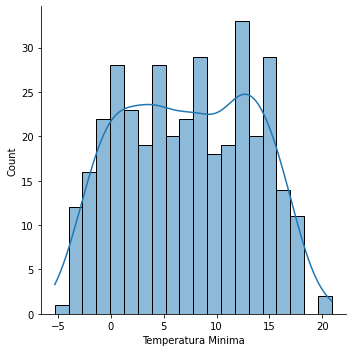

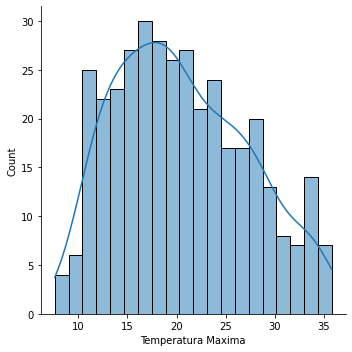

In [ ]:
sns.displot(df['Temperatura Minima'], bins=20, kde=True)
sns.displot(df['Temperatura Maxima'],bins=20, kde=True)

In [ ]:
df_completo.reset_index(drop=False, inplace=True)
df_completo.tail()

index  Dias  Temperatura Minima  Temperatura Maxima  Caudal de lluvia  \
361    361   361                 9.0                30.7               0.0   
362    362   362                 7.1                28.4               0.0   
363    363   363                12.5                19.9               0.0   
364    364   364                12.5                26.9               0.0   
365    365   365                12.3                30.2               0.0   

     Soleado dia de lluvia  RISK_MM Mañana va a lluver  
361     12.1            No      0.0                 No  
362     12.7            No      0.0                 No  
363      5.3            No      0.0                 No  
364      7.1            No      0.0                 No  
365     12.6            No      0.0                 No

In [ ]:
df_completo=pd.read_csv("/content/drive/Shareddrives/IA/weather (1).csv")

In [ ]:
df_completo.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
# df_completo.values
# df_completo.size
# df_completo.index
# df_completo.columns

In [ ]:
df_completo.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
df_completo[["MinTemp","MinTemp"]].head(), df_completo[['Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']].head()

(   MinTemp  MinTemp
 0      8.0      8.0
 1     14.0     14.0
 2     13.7     13.7
 3     13.3     13.3
 4      7.6      7.6,
    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm
 0       1019.7       1015.0         7         7     14.4     23.6
 1       1012.4       1008.4         5         3     17.5     25.7
 2       1009.5       1007.2         8         7     15.4     20.2
 3       1005.5       1007.0         2         7     13.5     14.1
 4       1018.3       1018.5         7         7     11.1     15.4)

# Regrecion lineal

## Cargar libreria


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


### Montaje de Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/Shareddrives/IA/autos.TXT', sep='\t')

In [ ]:
df


normalized-losses         make fuel-type aspiration num-of-doors  \
0                122.0  alfa-romero       gas        std          two   
1                122.0  alfa-romero       gas        std          two   
2                122.0  alfa-romero       gas        std          two   
3                164.0         audi       gas        std         four   
4                164.0         audi       gas        std         four   
..                 ...          ...       ...        ...          ...   
200               95.0        volvo       gas        std         four   
201               95.0        volvo       gas      turbo         four   
202               95.0        volvo       gas        std         four   
203               95.0        volvo    diesel      turbo         four   
204               95.0        volvo       gas      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front        88.6   168.8  ...   
1    convertible          rwd           front        88.6   168.8  ...   
2      hatchback          rwd           front        94.5   171.2  ...   
3          sedan          fwd           front        99.8   176.6  ...   
4          sedan          4wd           front        99.4   176.6  ...   
..           ...          ...             ...         ...     ...  ...   
200        sedan          rwd           front       109.1   188.8  ...   
201        sedan          rwd           front       109.1   188.8  ...   
202        sedan          rwd           front       109.1   188.8  ...   
203        sedan          rwd           front       109.1   188.8  ...   
204        sedan          rwd           front       109.1   188.8  ...   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
0           mpfi  3.47    2.68               9.0      111.0    5000.0   
1           mpfi  3.47    2.68               9.0      111.0    5000.0   
2           mpfi  2.68    3.47               9.0      154.0    5000.0   
3           mpfi  3.19    3.40              10.0      102.0    5500.0   
4           mpfi  3.19    3.40               8.0      115.0    5500.0   
..           ...   ...     ...               ...        ...       ...   
200         mpfi  3.78    3.15               9.5      114.0    5400.0   
201         mpfi  3.78    3.15               8.7      160.0    5300.0   
202         mpfi  3.58    2.87               8.8      134.0    5500.0   
203          idi  3.01    3.40              23.0      106.0    4800.0   
204         mpfi  3.78    3.15               9.5      114.0    5400.0   

    city-mpg  highway-mpg    price  symboling  
0       21.0         27.0  13495.0         _3  
1       21.0         27.0  16500.0         _3  
2       19.0         26.0  16500.0         _1  
3       24.0         30.0  13950.0         _2  
4       18.0         22.0  17450.0         _2  
..       ...          ...      ...        ...  
200     23.0         28.0  16845.0        _-1  
201     19.0         25.0  19045.0        _-1  
202     18.0         23.0  21485.0        _-1  
203     26.0         27.0  22470.0        _-1  
204     19.0         25.0  22625.0        _-1  

[205 rows x 26 columns]

In [9]:
df.reset_index(drop=False, inplace=True)
list_columns_renames = {"index": "Indice"}
df.rename(columns=list_columns_renames, inplace=True)

In [10]:
df.head()

Indice  normalized-losses         make fuel-type aspiration num-of-doors  \
0       0              122.0  alfa-romero       gas        std          two   
1       1              122.0  alfa-romero       gas        std          two   
2       2              122.0  alfa-romero       gas        std          two   
3       3              164.0         audi       gas        std         four   
4       4              164.0         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   
2    hatchback          rwd           front        94.5  ...         mpfi   
3        sedan          fwd           front        99.8  ...         mpfi   
4        sedan          4wd           front        99.4  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
1  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
2  2.68    3.47                9.0      154.0   5000.0      19.0        26.0   
3  3.19    3.40               10.0      102.0   5500.0      24.0        30.0   
4  3.19    3.40                8.0      115.0   5500.0      18.0        22.0   

     price  symboling  
0  13495.0         _3  
1  16500.0         _3  
2  16500.0         _1  
3  13950.0         _2  
4  17450.0         _2  

[5 rows x 27 columns]

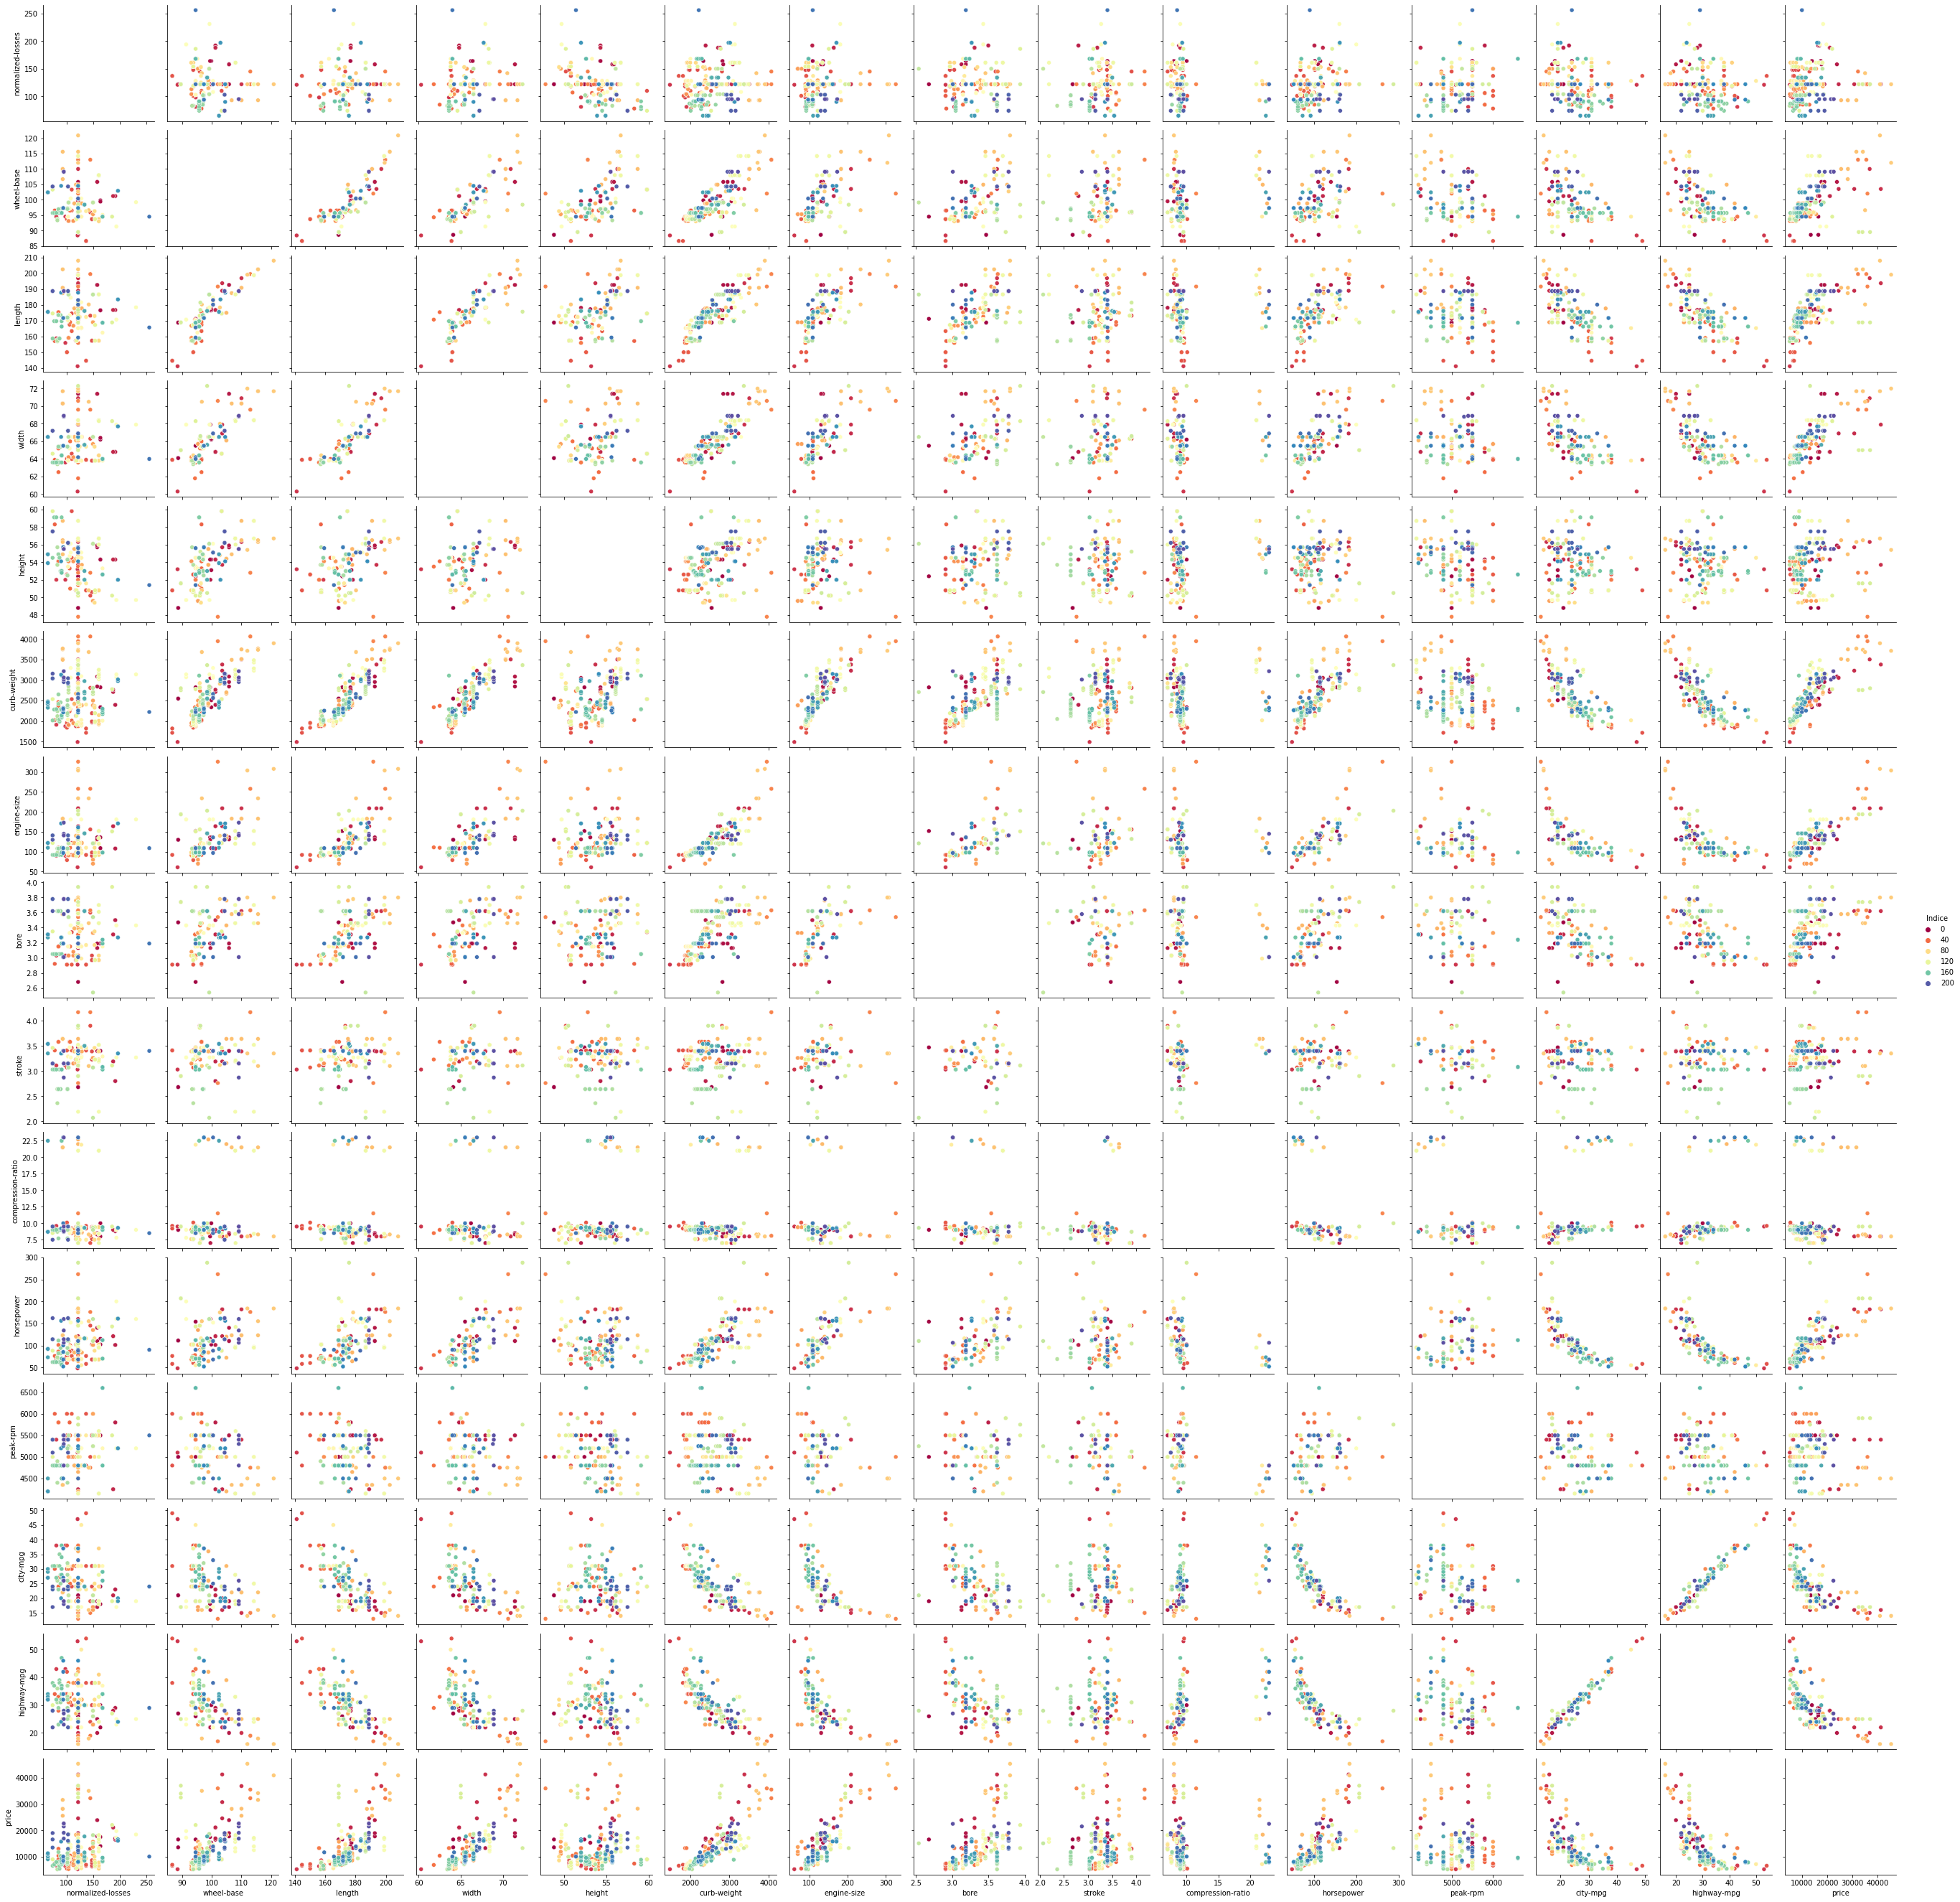

In [11]:
sns.pairplot(df, hue="Indice", palette= "Spectral", height=2.5)

In [14]:
df.head()

Indice  normalized-losses         make fuel-type aspiration num-of-doors  \
0       0              122.0  alfa-romero       gas        std          two   
1       1              122.0  alfa-romero       gas        std          two   
2       2              122.0  alfa-romero       gas        std          two   
3       3              164.0         audi       gas        std         four   
4       4              164.0         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   
2    hatchback          rwd           front        94.5  ...         mpfi   
3        sedan          fwd           front        99.8  ...         mpfi   
4        sedan          4wd           front        99.4  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
1  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
2  2.68    3.47                9.0      154.0   5000.0      19.0        26.0   
3  3.19    3.40               10.0      102.0   5500.0      24.0        30.0   
4  3.19    3.40                8.0      115.0   5500.0      18.0        22.0   

     price  symboling  
0  13495.0         _3  
1  16500.0         _3  
2  16500.0         _1  
3  13950.0         _2  
4  17450.0         _2  

[5 rows x 27 columns]

In [13]:
df.columns

Index(['Indice', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'symboling'],
      dtype='object')

In [23]:
numerical_features = df[['Indice', 'normalized-losses', 'wheel-base', 'bore', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price' ]]

In [24]:
numerical_features.head()

Indice  normalized-losses  wheel-base  bore  compression-ratio  horsepower  \
0       0              122.0        88.6  3.47                9.0       111.0   
1       1              122.0        88.6  3.47                9.0       111.0   
2       2              122.0        94.5  2.68                9.0       154.0   
3       3              164.0        99.8  3.19               10.0       102.0   
4       4              164.0        99.4  3.19                8.0       115.0   

   peak-rpm  city-mpg  highway-mpg    price  
0    5000.0      21.0         27.0  13495.0  
1    5000.0      21.0         27.0  16500.0  
2    5000.0      19.0         26.0  16500.0  
3    5500.0      24.0         30.0  13950.0  
4    5500.0      18.0         22.0  17450.0

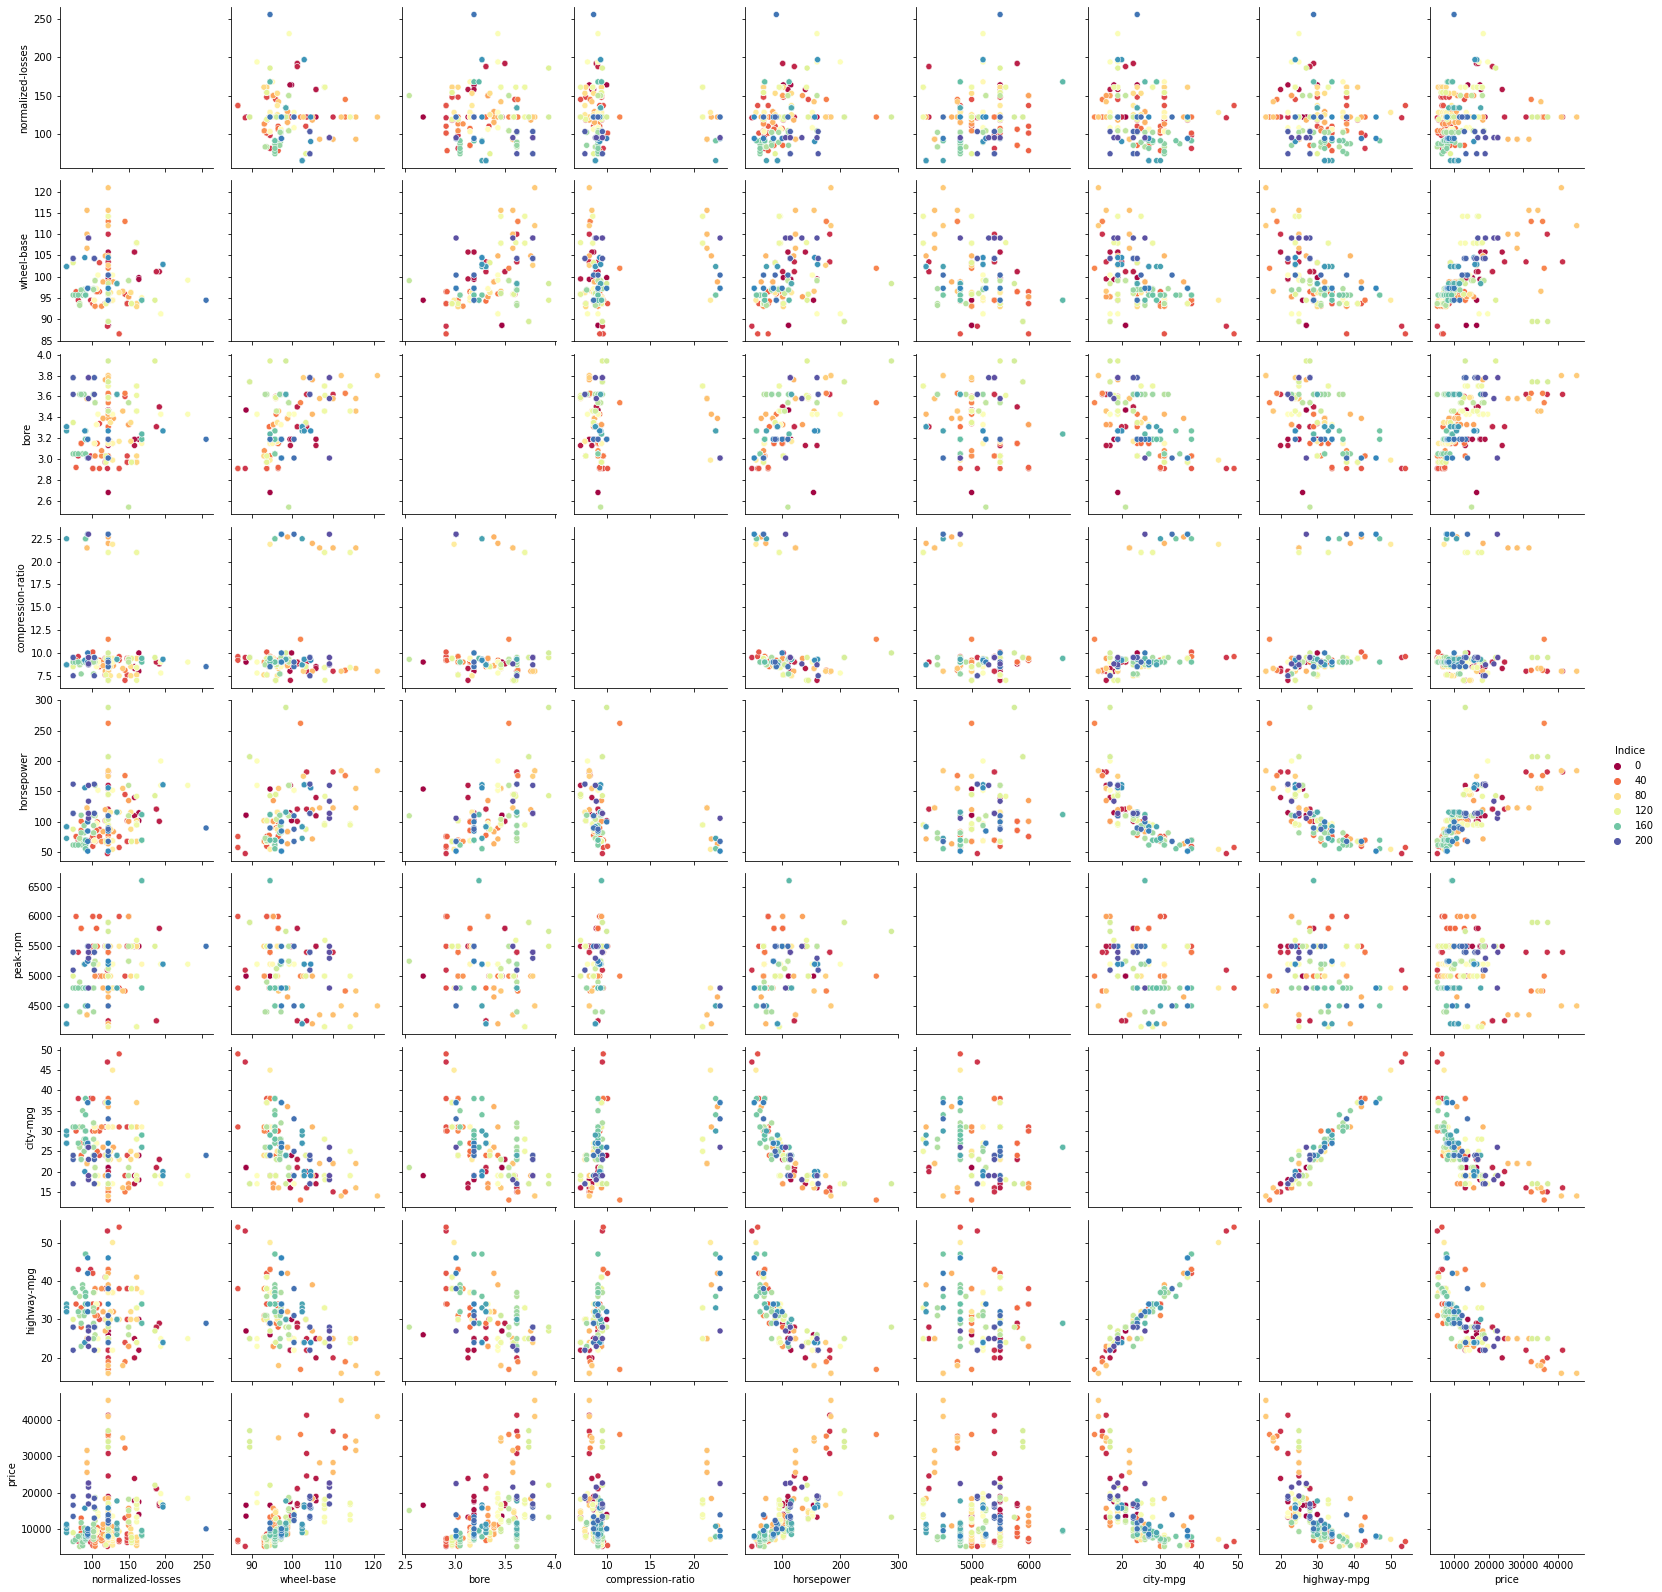

In [25]:
sns.pairplot(numerical_features, hue="Indice", palette= "Spectral", height=2.5) 

Vemos que existe una relacion practicamente lineal entre la velocidad en carretera en relacion a la velocidad en ciudad, no es evidente otra relacion peor se analizara el Precio en funcion de los caballos de fuerza

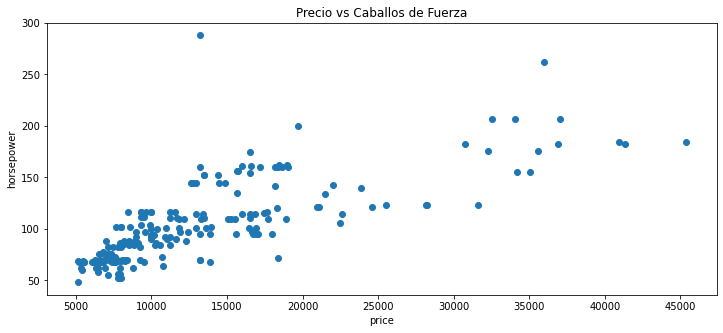

In [27]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('price')
plot1.set_ylabel('horsepower')
plot1.set_title('Precio vs Caballos de Fuerza')
plot1.scatter(df["price"], df["horsepower"])
plt.show()

In [36]:
X=df['price']
X=np.array(X)

Y=df['horsepower']
Y=np.array(Y)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
X_train_reshape=X_train.reshape(-1,1)
Y_train_reshape=Y_train.reshape(-1,1)

me indica como esta la variable (la tengo en 1d y debo pasarla a 2d)

In [49]:
X_train.shape

(164,)

In [47]:
Y_train_reshape.shape

(164, 1)

In [44]:
regresion=linear_model.LinearRegression()

In [48]:
regresion.fit(X_train_reshape,Y_train_reshape)

LinearRegression()

In [50]:
regresion.coef_

array([[0.00398791]])

In [51]:
regresion.intercept_

array([52.47945228])

In [54]:
X_test_reshape=X_test.reshape(-1,1)
Y_test_reshape=Y_test.reshape(-1,1)

In [55]:
predict=regresion.predict(X_test_reshape)

In [57]:
mean_squared_error(Y_test_reshape, predict)

555.9611427716148

In [ ]:
regresion.score(X_train_reshape, Y_train_reshape)

In [58]:
regresion.score(X_test_reshape, Y_test_reshape)

0.5851113606523162

Text(0, 0.5, 'Caballos de Fuerza')

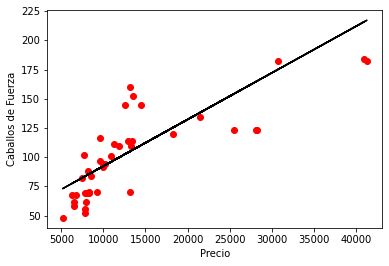

In [59]:
plt.scatter(X_test_reshape, Y_test_reshape, color = "r")
plt.plot(X_test_reshape, predict, color = "black")
plt.xlabel ("Precio")
plt.ylabel ("Caballos de Fuerza")

In [61]:
target_ex=regresion.predict([[20000]])
print(int(target_ex))

132


### Otro Ejemplo de Regresion Lineal

In [63]:
numerical_features.head()

Indice  normalized-losses  wheel-base  bore  compression-ratio  horsepower  \
0       0              122.0        88.6  3.47                9.0       111.0   
1       1              122.0        88.6  3.47                9.0       111.0   
2       2              122.0        94.5  2.68                9.0       154.0   
3       3              164.0        99.8  3.19               10.0       102.0   
4       4              164.0        99.4  3.19                8.0       115.0   

   peak-rpm  city-mpg  highway-mpg    price  
0    5000.0      21.0         27.0  13495.0  
1    5000.0      21.0         27.0  16500.0  
2    5000.0      19.0         26.0  16500.0  
3    5500.0      24.0         30.0  13950.0  
4    5500.0      18.0         22.0  17450.0

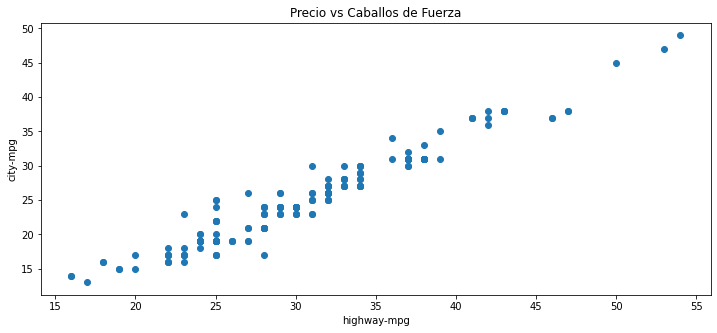

In [69]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('highway-mpg')
plot1.set_ylabel('city-mpg')
plot1.set_title('Velocidad en la ciudad vs en la ruta')
plot1.scatter(df["highway-mpg"], df["city-mpg"])
plt.show()

In [74]:
X = df['highway-mpg']
X=np.array(X)

Y = df['city-mpg']
Y=np.array(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
X_train_reshape=X_train.reshape(-1,1)
Y_train_reshape=Y_train.reshape(-1,1)

X_test_reshape=X_test.reshape(-1,1)
Y_test_reshape=Y_test.reshape(-1,1)

In [76]:
regresion=linear_model.LinearRegression()

regresion.fit(X_train_reshape,Y_train_reshape)

LinearRegression()

In [79]:
coef_regresion = regresion.coef_
intecept_y = regresion.intercept_

print(" Pendiente de la recta",coef_regresion,"\n", "Interseccion con el eje y",intecept_y )

 Pendiente de la recta [[0.92429766]] 
 Interseccion con el eje y [-3.18553956]


In [80]:
predict=regresion.predict(X_test_reshape)
mean_squared_error(Y_test_reshape, predict)
regresion.score(X_test_reshape, Y_test_reshape)

0.9741423680296635

Text(0, 0.5, 'Ciudad')

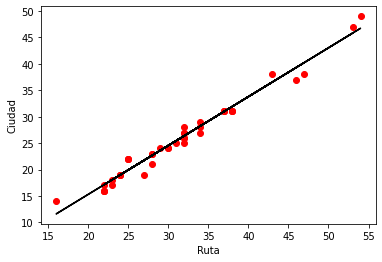

In [81]:
plt.scatter(X_test_reshape, Y_test_reshape, color = "r")
plt.plot(X_test_reshape, predict, color = "black")
plt.xlabel ("Ruta")
plt.ylabel ("Ciudad")

##Regresión Logistica

$$P(y |x, \beta) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x)}}$$

In [62]:
df.head()

Indice  normalized-losses         make fuel-type aspiration num-of-doors  \
0       0              122.0  alfa-romero       gas        std          two   
1       1              122.0  alfa-romero       gas        std          two   
2       2              122.0  alfa-romero       gas        std          two   
3       3              164.0         audi       gas        std         four   
4       4              164.0         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   
2    hatchback          rwd           front        94.5  ...         mpfi   
3        sedan          fwd           front        99.8  ...         mpfi   
4        sedan          4wd           front        99.4  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
1  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
2  2.68    3.47                9.0      154.0   5000.0      19.0        26.0   
3  3.19    3.40               10.0      102.0   5500.0      24.0        30.0   
4  3.19    3.40                8.0      115.0   5500.0      18.0        22.0   

     price  symboling  
0  13495.0         _3  
1  16500.0         _3  
2  16500.0         _1  
3  13950.0         _2  
4  17450.0         _2  

[5 rows x 27 columns]